### Concurrency 2022/2023

## Quantum Computing - Final Project 

## Solving satisfiability problems with Grover's Algorithm

Trabalho realizado por:

Carlos Eduardo da Silva Machado A96936

Gonçalo Manuel Maia de Sousa A97485

## Descrição do Problema

O algoritmo de Grover é considerado um dos mais poderosos algoritmos quânticos, pois oferece uma melhoria quadrática ($\mathcal{O}(\sqrt{N})$) em relação aos algoritmos clássicos ($\mathcal{O}(N)$), quando falamos em procuras não estruturadas. Mas podemos generalizar este algoritmo para outros problemas como o problema de satisfazibilidade que procuramos resolver neste trabalho.

Queremos, portanto, resolver o problema de satisfazibilidade através do algoritmo de Grover, para tal, vamos:
1. Criar uma fórmula 3-SAT solucionável;
2. Implementar o algoritmo de Grover de forma a resolver o problema;
3. Avaliar a qualidade da solução obtida pelo algoritmo;
4. Estudar a complexidade associada ao algoritmo aplicado ao problema.

## Resolução do Problema

#####  Desenvolvimento de uma formula 3-SAT solucionável

Uma fórmula 3-SAT é composta por um ou mais clausulas que são constitúidas por exatamente 3 literais, sendo assim, um exemplo para uma fórmula 3-SAT seria $f(v_1,v_2,v_3) = (\neg v_1 \lor v_2 \lor v_3) \land (v_1 \lor \neg v_2 \lor v_3)$.
A tabela da verdade para esta fórmula exemplo será:

f1 = $(\neg v_1 \lor v_2 \lor v_3)$

f2 = $(v_1 \lor \neg v_2 \lor v_3)$

| v1 | v2 | v3 | f1 | f2 | f |
| :---: | :---: | :---: | :---: | :---: | :---: |
| 0 | 0 | 0 | 1 | 1 | 1 |
| 0 | 0 | 1 | 1 | 1 | 1 |
| 0 | 1 | 0 | 1 | 0 | 0 |
| 0 | 1 | 1 | 1 | 1 | 1 |
| 1 | 0 | 0 | 0 | 1 | 0 |
| 1 | 0 | 1 | 1 | 1 | 1 |
| 1 | 1 | 0 | 1 | 1 | 1 |
| 1 | 1 | 1 | 1 | 1 | 1 |

Neste exemplo, temos uma fórmula 3-SAT com mais de uma solução.

Vamos procurar por uma fórmula 3-SAT com apenas uma solução, por isso, pegamos na fórmula exemplo e acrescentamos algumas clausulas de forma a termos apenas uma solução:


$$f(v_1,v_2,v_3) = (\neg v_1 \lor v_2 \lor v_3) \land (v_1 \lor \neg v_2 \lor v_3) \land (v_1 \lor v_2 \lor v_3) \land (v_1 \lor \neg v_2 \lor \neg v_3) \land (\neg v_1 \lor v_2 \lor \neg v_3) \land (\neg v_1 \lor \neg v_2 \lor v_3) \land (\neg v_1 \lor \neg v_2 \lor \neg v_3)$$

$$
f1 = (\neg v_1 \lor v_2 \lor v_3) \\
f2 = (v_1 \lor \neg v_2 \lor v_3) \\
f3 = (v_1 \lor v_2 \lor v_3) \\
f4 = (v_1 \lor \neg v_2 \lor \neg v_3) \\
f5 = (\neg v_1 \lor v_2 \lor \neg v_3) \\
f6 = (\neg v_1 \lor \neg v_2 \lor v_3) \\
f7 = (\neg v_1 \lor \neg v_2 \lor \neg v_3)
$$

$$f(v_1,v_2,v_3) = \neg(v_1 \land \neg v_2 \land \neg v_3) \land \neg (\neg v_1 \land v_2 \land \neg v_3) \land \neg (\neg v_1 \land \neg v_2 \land \neg v_3) \land \neg (\neg v_1 \land v_2 \land v_3) \land \neg (v_1 \land \neg v_2 \land v_3) \land \neg (v_1 \land v_2 \land \neg v_3) \land \neg (v_1 \land v_2 \land v_3)$$

$$
f1 = \neg (v_1 \land \neg v_2 \land \neg v_3) \\
f2 = \neg (\neg v_1 \land v_2 \land \neg v_3) \\
f3 = \neg (\neg v_1 \land \neg v_2 \land \neg v_3) \\
f4 = \neg (\neg v_1 \land v_2 \land v_3) \\
f5 = \neg (v_1 \land \neg v_2 \land v_3) \\
f6 = \neg (v_1 \land v_2 \land \neg v_3) \\
f7 = \neg (v_1 \land v_2 \land v_3)
$$


Deste modo, a nova tabela da verdade será:

| v1 | v2 | v3 | f1 | f2 | f3 | f4 | f5 | f6 | f7 | f |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 0 | 0 | 0 | 1 | 1 | 0 | 1 | 1 | 1 | 1 | 0 |
| 0 | 0 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
| 0 | 1 | 0 | 1 | 0 | 1 | 1 | 1 | 1 | 1 | 0 |
| 0 | 1 | 1 | 1 | 1 | 1 | 0 | 1 | 1 | 1 | 0 |
| 1 | 0 | 0 | 0 | 1 | 1 | 1 | 1 | 1 | 1 | 0 |
| 1 | 0 | 1 | 1 | 1 | 1 | 1 | 0 | 1 | 1 | 0 |
| 1 | 1 | 0 | 1 | 1 | 1 | 1 | 1 | 0 | 1 | 0 |
| 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 0 | 0 |

In [3]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, execute
from qiskit.tools.visualization import plot_histogram, plot_distribution
from qiskit.circuit.library import ZGate, MCXGate
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def execute_circuit(qc, shots=1024, decimal=False, reversed=False):
    
    #define backend
    device = Aer.get_backend('qasm_simulator')
    #get counts
    counts = execute(qc, device, shots=shots).result().get_counts()
    
    if decimal:
        if reversed:
            counts = dict((int(a[::-1],2),b) for (a,b) in counts.items())
        else:
            counts = dict((int(a,2),b) for (a,b) in counts.items())
    else:
        if reversed:
            counts = dict((a[::-1],b) for (a,b) in counts.items())
        else:
            counts = dict((a,b) for (a,b) in counts.items())

    return counts

In [6]:
def oracle(qr, ancilla, bitstring=None):
    qc = QuantumCircuit(qr, ancilla)
    cx_gate = MCXGate(len(qr),ctrl_state=bitstring)
    qc = qc.compose(cx_gate)
    
    qc.barrier()
    return qc

In [7]:
def diffusion_operator(qr, ancilla, n_qubits):

    qc = QuantumCircuit(qr,ancilla)
    
    qc.h(qr)
    qc.x(qr[-1])
    
    cz = ZGate().control(n_qubits-1, ctrl_state="0"*(n_qubits-1))
    qc = qc.compose(cz)
    
    qc.x(qr[-1])
    qc.h(qr)
    
    qc.barrier()
    
    return qc 

In [8]:
def grover(n_qubits, bitstring):
    qr = QuantumRegister(n_qubits, name="Literal")
    cr = ClassicalRegister(n_qubits)
    ancilla = QuantumRegister(1, name="Ancilla")
    
    qc = QuantumCircuit(qr,ancilla,cr)
    qc.h(qr)
    qc.x(ancilla)
    qc.h(ancilla)
    
    qc = qc.compose(oracle(qr, ancilla, bitstring=bitstring))
    qc = qc.compose(diffusion_operator(qr, ancilla, n_qubits))
    
    qc.barrier()
    
    return qc.draw(output="mpl")

In [9]:
def optimalIterations(n_qubits, bitstring, mpl=True):
    qr=QuantumRegister(n_qubits, name="Literal")
    ancilla=QuantumRegister(1, name="Ancilla")
    cr=ClassicalRegister(n_qubits)
    
    qc = QuantumCircuit(qr,ancilla,cr)
    qc.x(ancilla)
    qc.h(ancilla)
    
    elements = 2**n_qubits
    iterations=int(np.floor(np.pi/4 * np.sqrt(elements)))
    
    for j in range(iterations):
        qc = qc.compose(oracle(qr,ancilla,bitstring=bitstring))
        qc = qc.compose(diffusion_operator(qr,ancilla,n_qubits))
    
    qc.measure(qr,cr)
    
    if(mpl):
        return qc.draw(output="mpl")
    else:
        counts = execute_circuit(qc, shots=1024)
        return plot_distribution(counts)

In [10]:
n_qubits = 3
bitstring = "001"

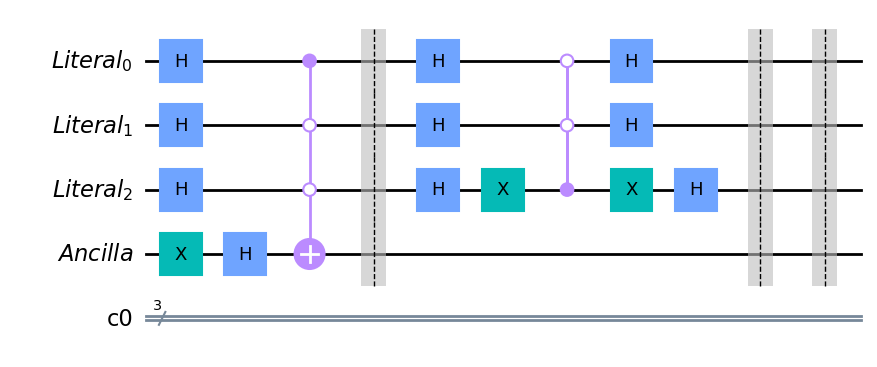

In [11]:
grover(n_qubits,bitstring)

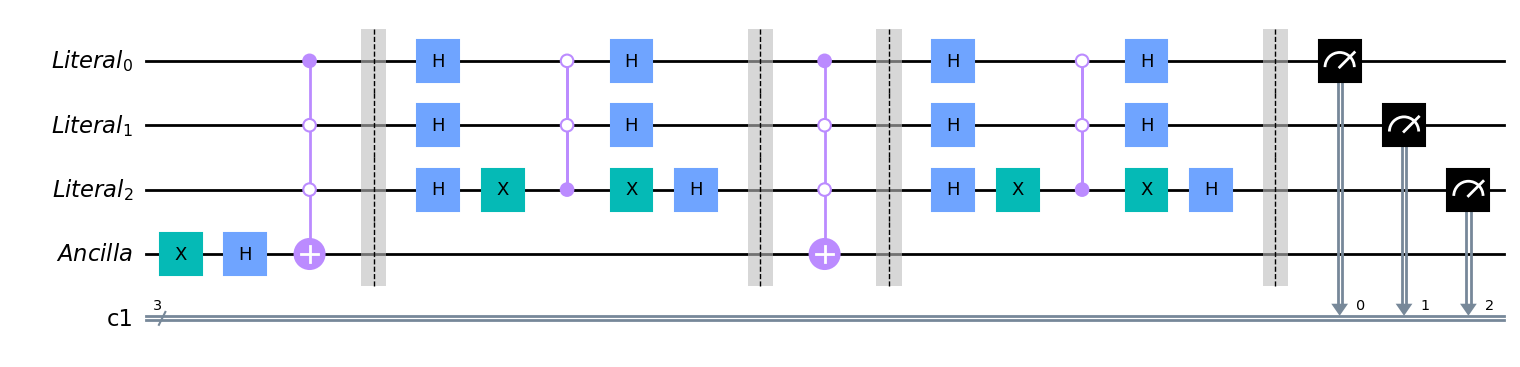

In [9]:
optimalIterations(n_qubits,bitstring)

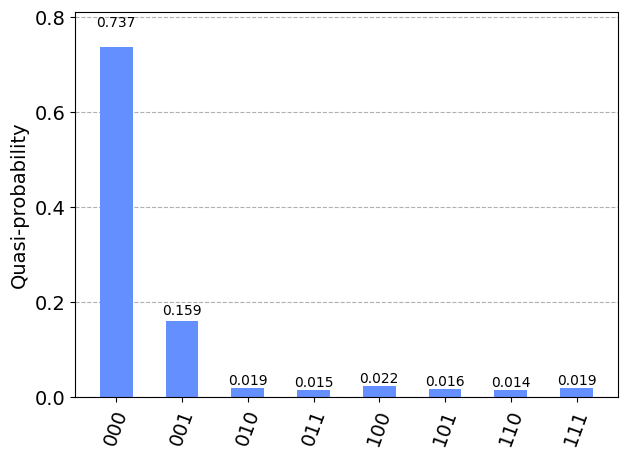

In [10]:
optimalIterations(n_qubits,bitstring, mpl=False)

In [12]:
def SAT_Oracle(qr, ancillas, bitstring=None):
    
    qc = QuantumCircuit(qr,ancillas)

    #f1
    qc.x(qr[1])
    qc.x(qr[2])
    qc.mcx(qr,ancillas[0])
    qc.x(ancillas[0])
    qc.x(qr[1])
    qc.x(qr[2])
    
    #f2
    qc.x(qr[0])
    qc.x(qr[2])
    qc.mcx(qr,ancillas[1])
    qc.x(ancillas[1])
    qc.x(qr[0])
    qc.x(qr[2])
    
    #f3
    qc.x(qr[0])
    qc.x(qr[1])
    qc.x(qr[2])
    qc.mcx(qr,ancillas[2])
    qc.x(ancillas[2])
    qc.x(qr[0])
    qc.x(qr[1])
    qc.x(qr[2])
    
    #f4
    qc.x(qr[0])
    qc.mcx(qr,ancillas[3])
    qc.x(ancillas[3])
    qc.x(qr[0])
    
    #f5
    qc.x(qr[1])
    qc.mcx(qr,ancillas[4])
    qc.x(ancillas[4])
    qc.x(qr[1])
    
    #f6
    qc.x(qr[2])
    qc.mcx(qr,ancillas[5])
    qc.x(ancillas[5])
    qc.x(qr[2]) 

    #f7
    qc.mcx(qr,ancillas[6])
    qc.x(ancillas[6])

    qc.mcx(ancillas[:-1],ancillas[-1])

    qc.barrier()
    
    return qc

In [19]:
def SAT_Grover(n_qubits,n_ancillas, bitstring):
    qr = QuantumRegister(n_qubits, name="Literal")
    cr = ClassicalRegister(n_qubits)
    ancillas = QuantumRegister(n_ancillas, name="Ancilla")
    
    qc = QuantumCircuit(qr,ancillas,cr)
    qc.h(qr)
    qc.x(ancillas)
    qc.h(ancillas)
    
    qc = qc.compose(SAT_Oracle(qr, ancillas, bitstring=bitstring))
    qc = qc.compose(diffusion_operator(qr, ancillas, n_qubits))
    
    qc.barrier()
    
    return qc.draw(output="mpl")

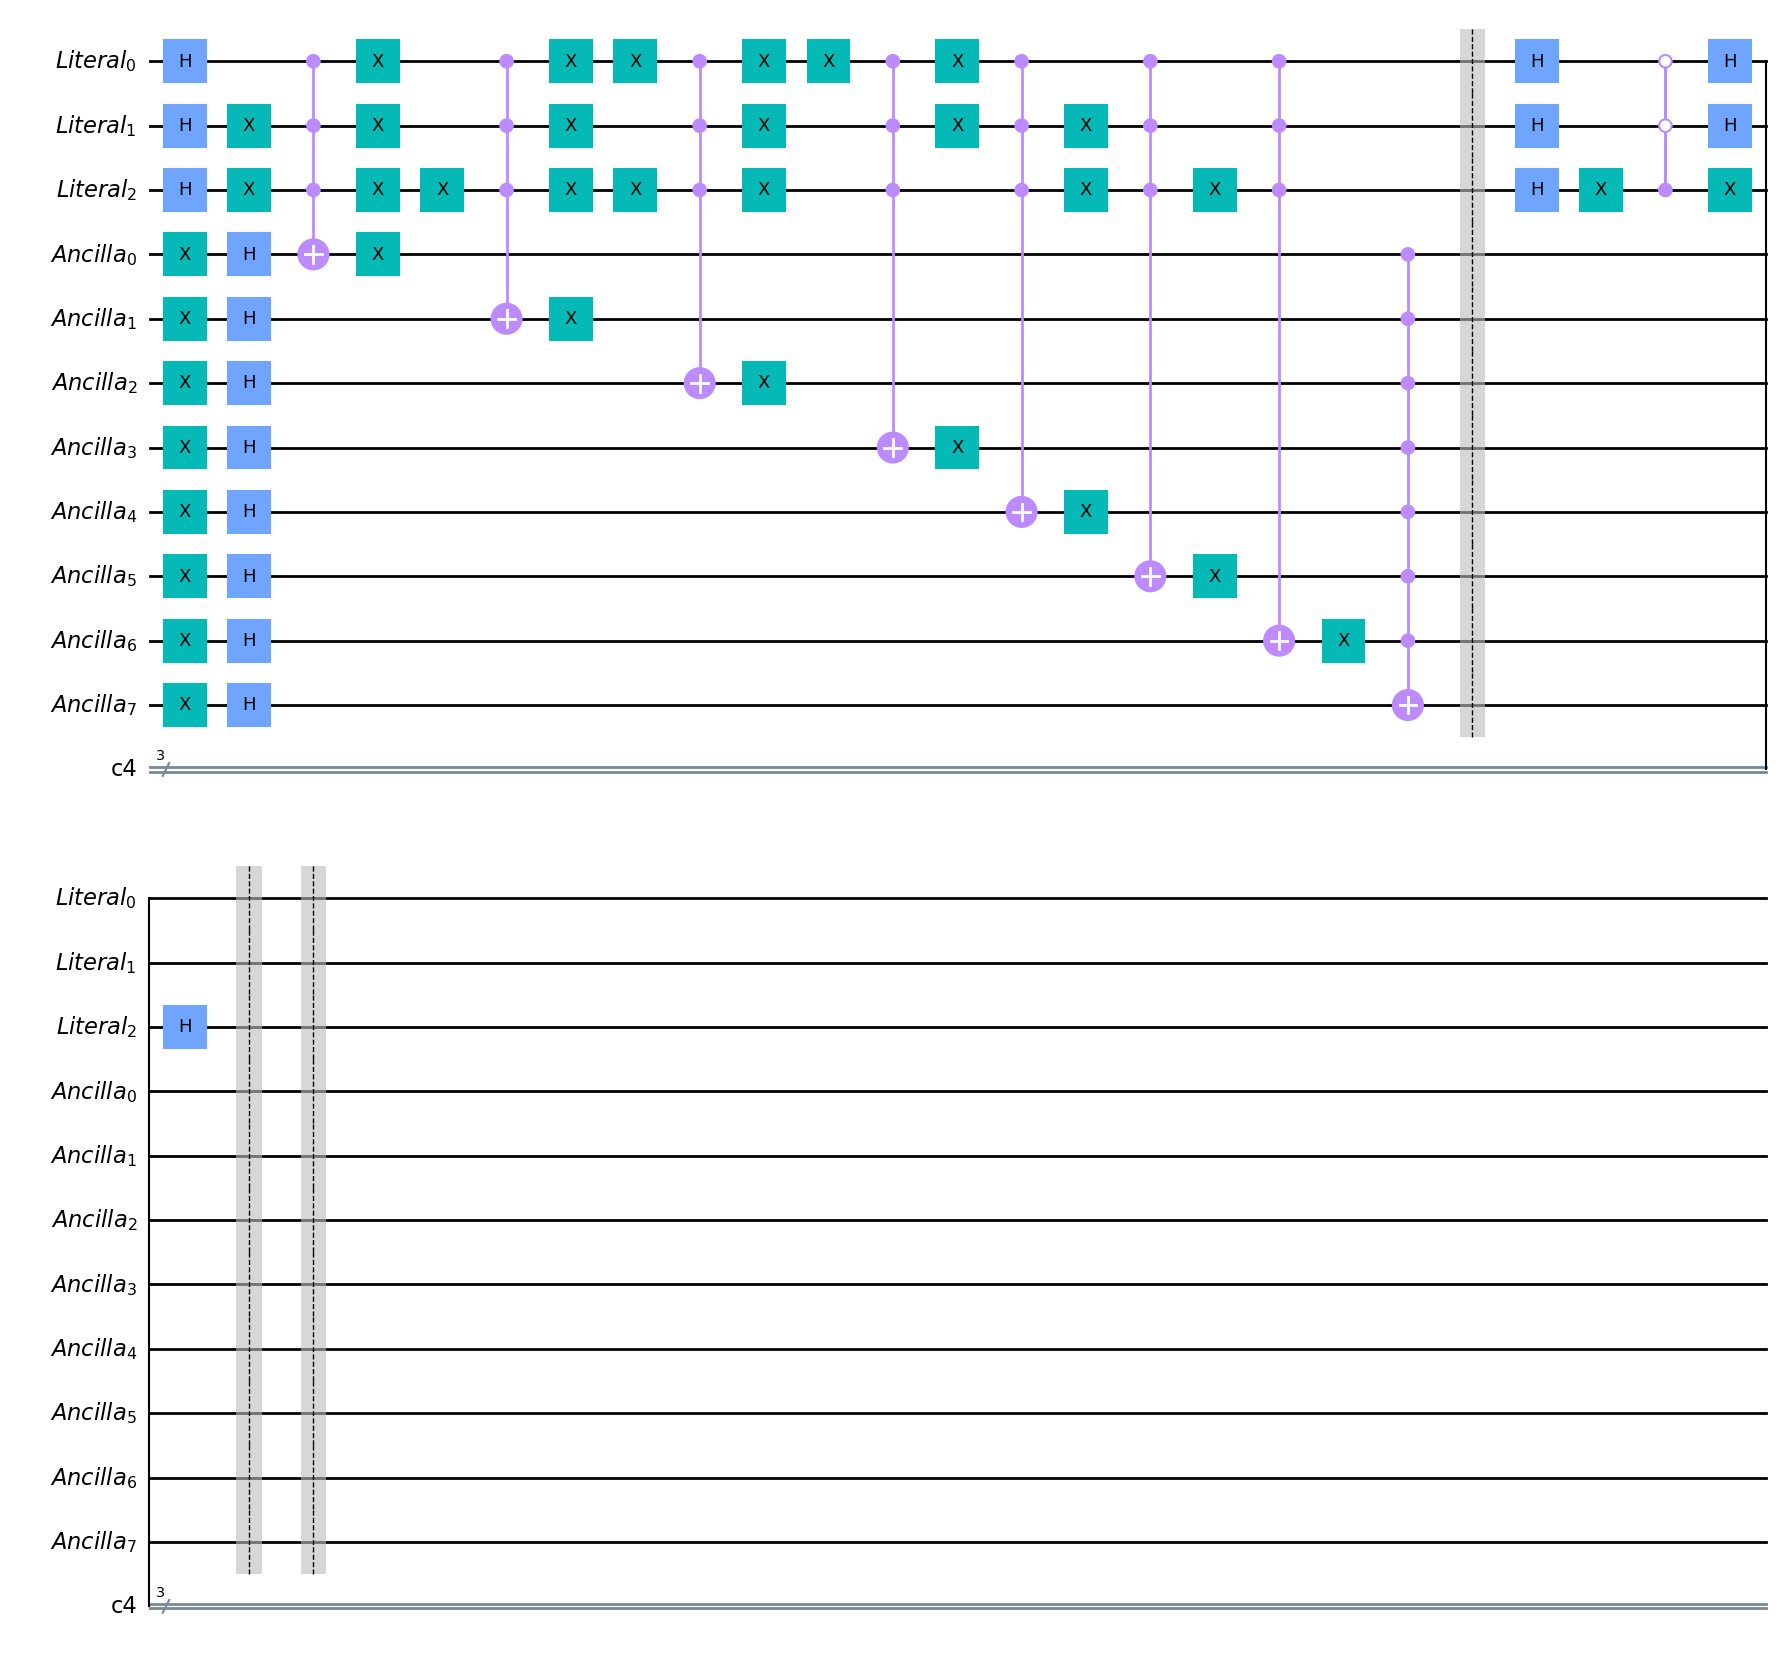

In [20]:
SAT_Grover(3,8,"001")

In [27]:
def SAT_optimalIterations(n_qubits,n_ancillas, bitstring, mpl=True):
    qr=QuantumRegister(n_qubits, name="Literal")
    ancillas=QuantumRegister(n_ancillas, name="Ancilla")
    cr=ClassicalRegister(n_qubits)
    
    qc = QuantumCircuit(qr,ancillas,cr)
    qc.x(ancillas)
    qc.h(ancillas)
    
    elements = 2**n_qubits
    iterations=int(np.floor(np.pi/4 * np.sqrt(elements)))
    
    for j in range(iterations):
        qc = qc.compose(SAT_Oracle(qr,ancillas,bitstring=bitstring))
        qc = qc.compose(diffusion_operator(qr,ancillas,n_qubits))
    
    qc.measure(qr,cr)
    
    if(mpl):
        return qc.draw(output="mpl")
    else:
        counts = execute_circuit(qc, shots=1024, reversed=True)
        return plot_distribution(counts)

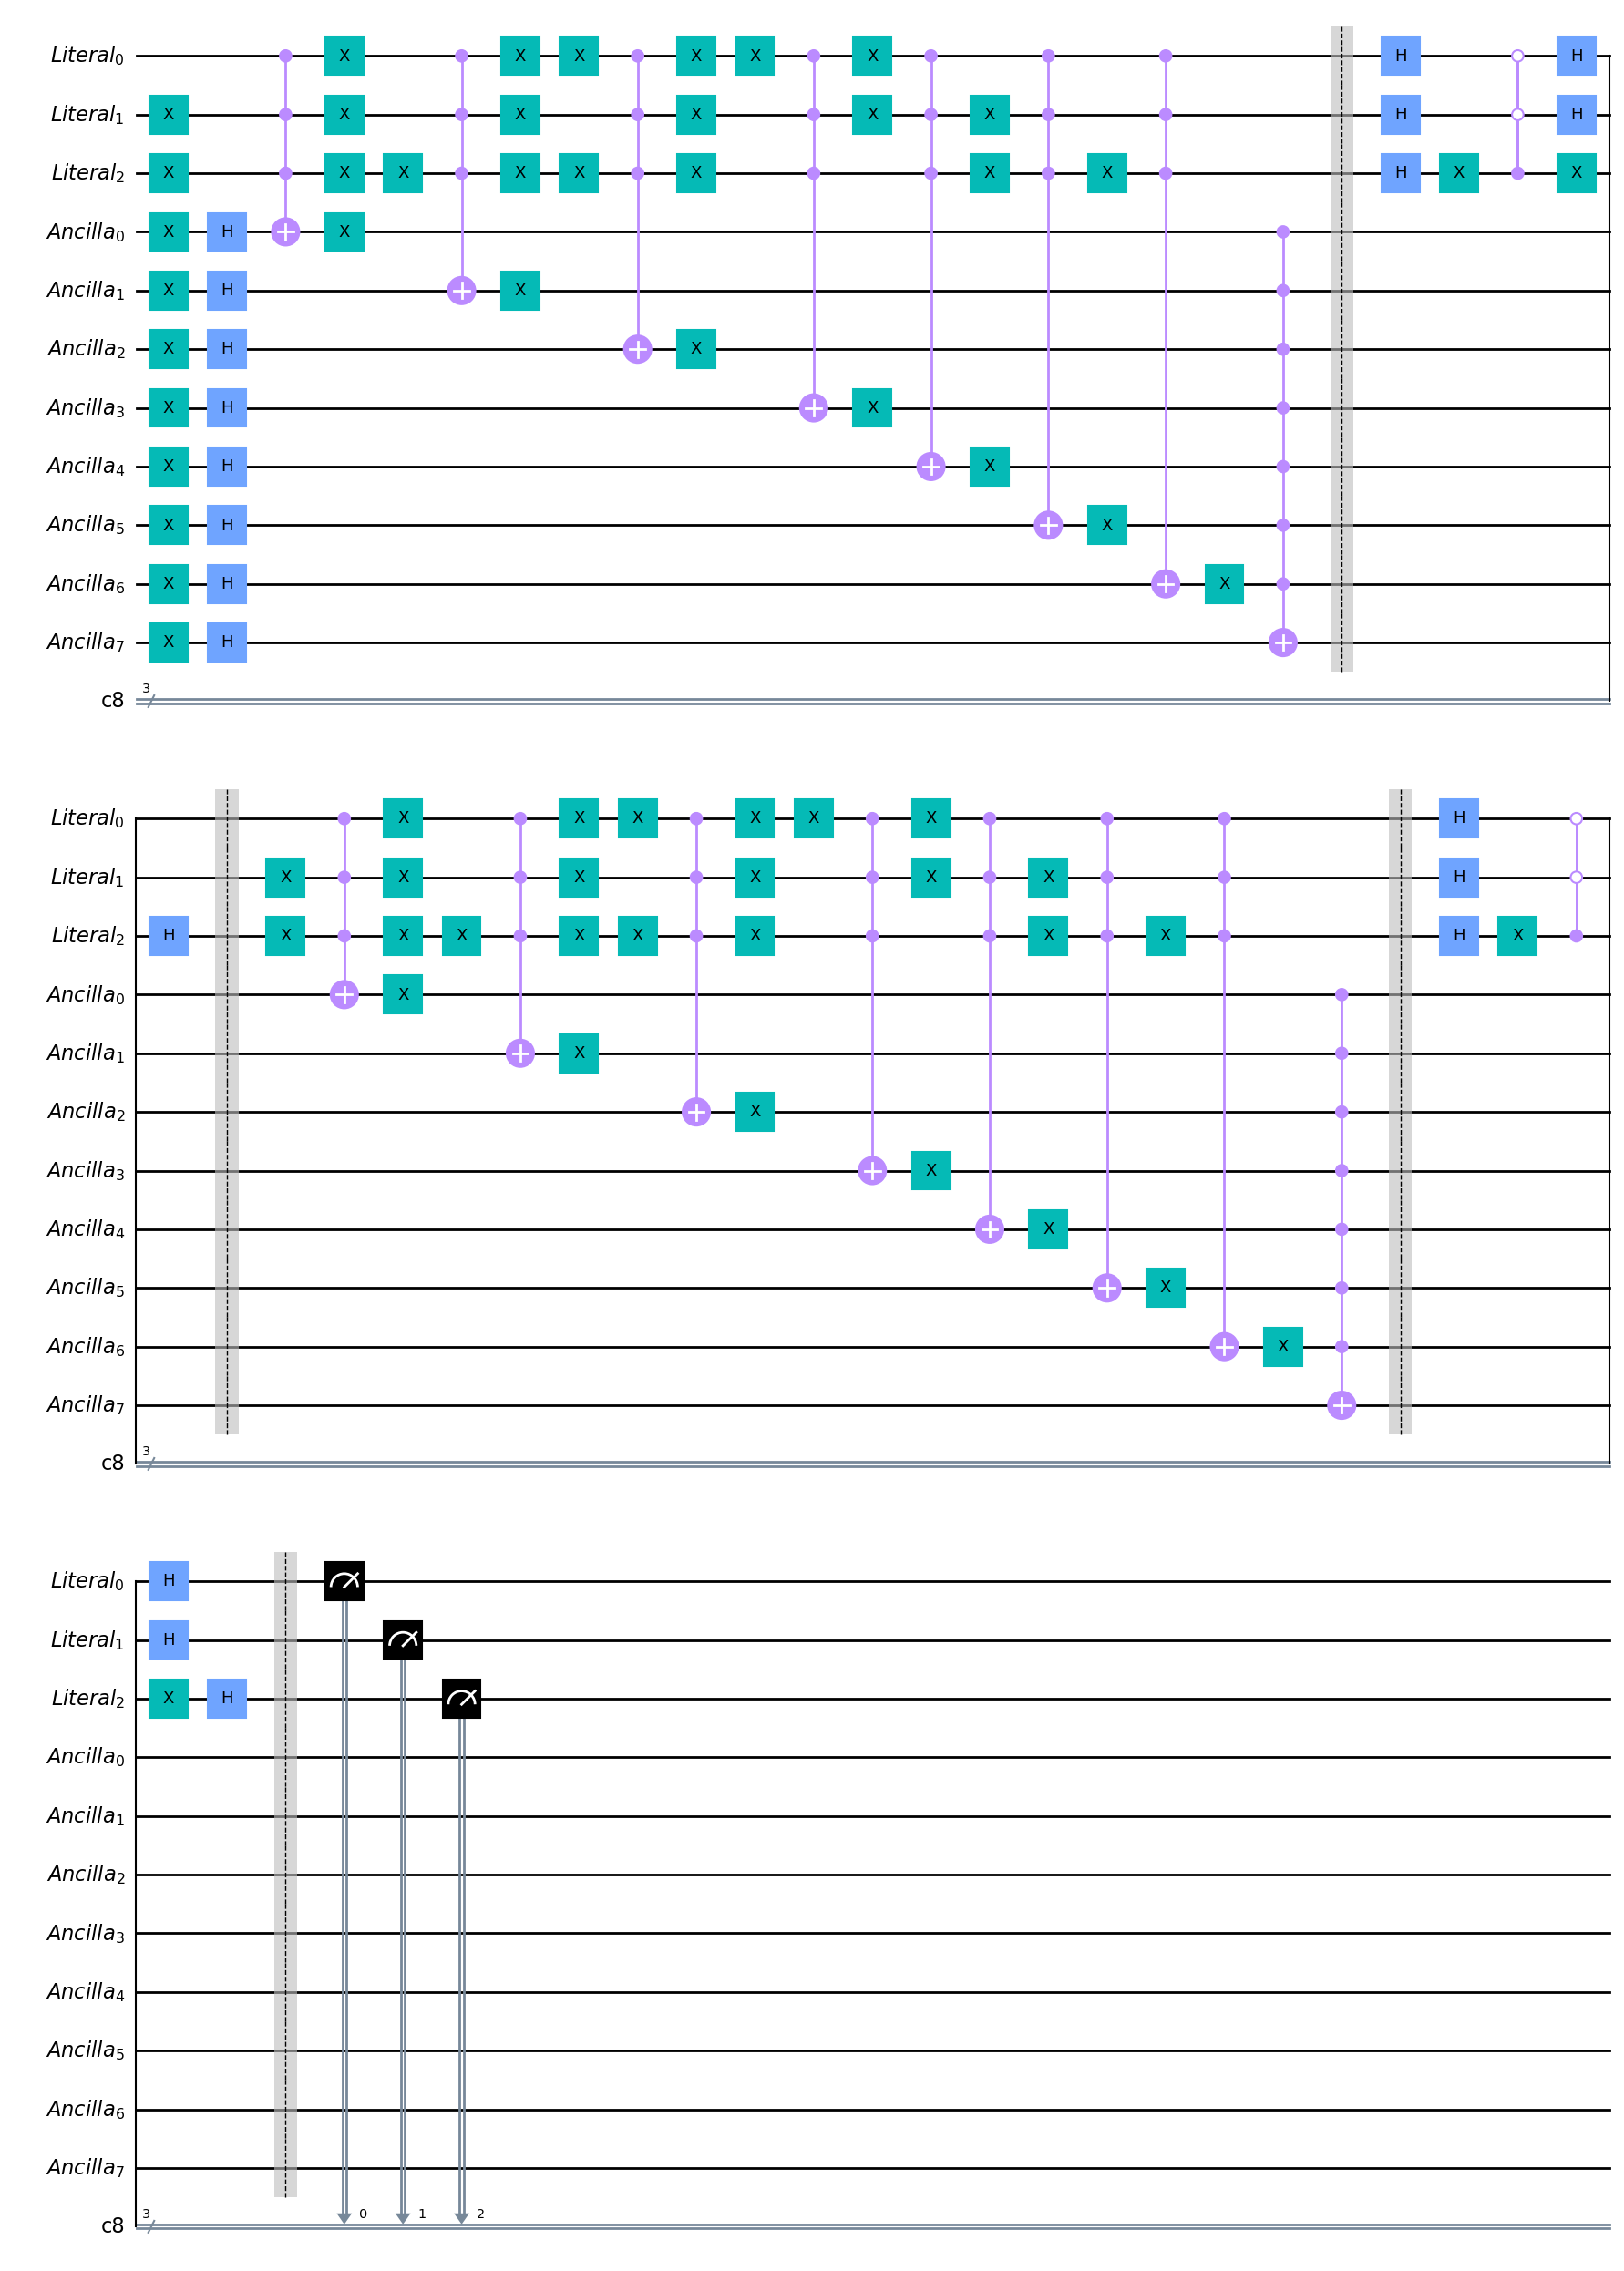

In [28]:
SAT_optimalIterations(3,8,"001")

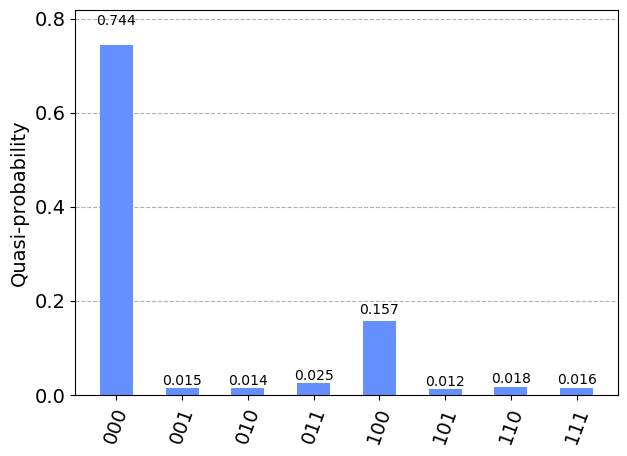

In [29]:
SAT_optimalIterations(3,8,"001", mpl=False)